# Advanced Linear Regression 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1390]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1391]:
# import Liberies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn import linear_model, metrics

In [1392]:
Housing_Data = pd.read_csv("d:/train.csv")

In [1393]:
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1394]:
Housing_Data.shape

(1460, 81)

In [1395]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1396]:
Housing_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


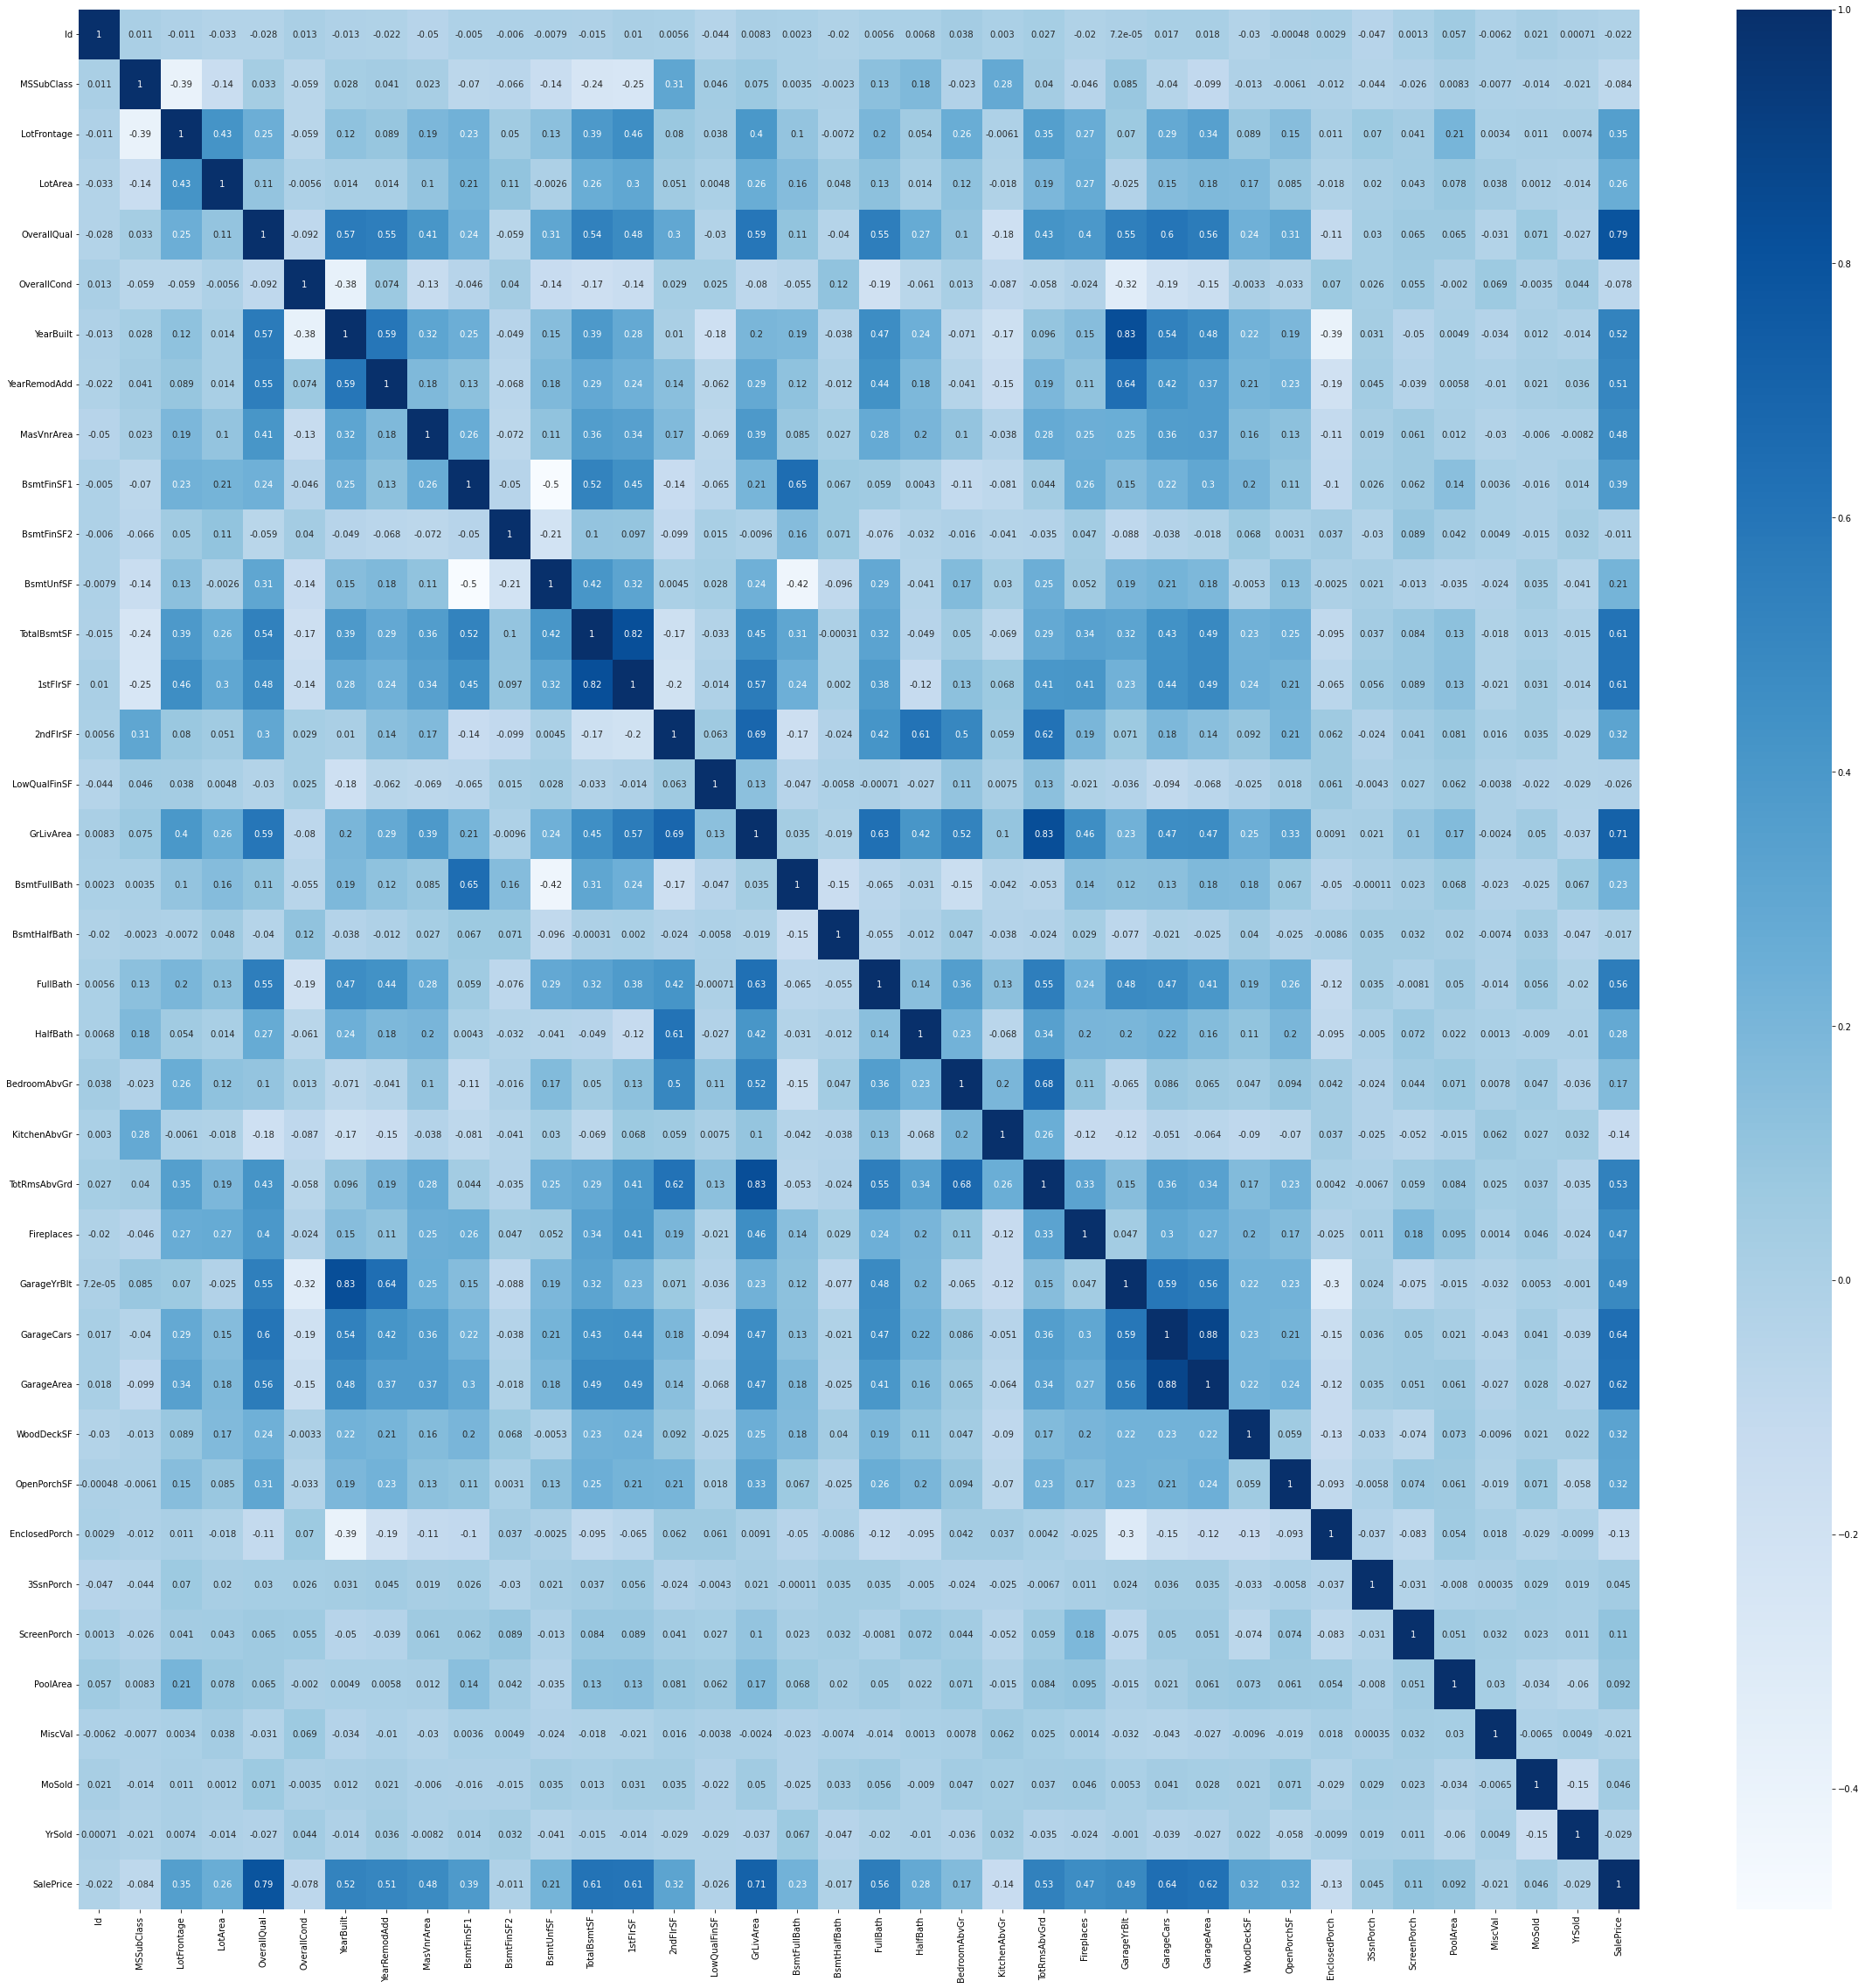

In [1397]:
# checking the relation between all the variables
plt.figure(figsize=(40,40))
sns.heatmap(Housing_Data.corr(), annot = True, cmap='Blues')
plt.show()

In [1398]:
#  Duplicate Details about the Data
Housing_Data.duplicated().sum()

0

In [1399]:
#Finding MISSING Percentage 
null_perc = round(100*(Housing_Data.isnull().sum()/len(Housing_Data.index)), 2)

#Printing columns which have more than 30% missing values
null_perc[ null_perc > 30 ]

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [1400]:
#Removing columns which has more than 30% null values in it.
Housing_Data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [1401]:
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1402]:
Housing_Data.isnull().sum() # Check still ay null values are present

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1403]:
Housing_Data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [1404]:
Housing_Data.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
HalfBath            3
GarageFinish        3
Fireplaces          4
BsmtQual            4
ExterQual           4
BsmtFullBath        4
MasVnrType          4
FullBath            4
KitchenAbvGr        4
KitchenQual         4
BsmtExposure        4
BsmtCond            4
LandContour         4
LotShape            4
BldgType            5
YrSold              5
Electrical          5
GarageCars          5
LotConfig           5
GarageQual          5
GarageCond          5
ExterCond           5
MSZoning            5
HeatingQC           5
BsmtFinType1        6
BsmtFinType2        6
Heating             6
RoofStyle           6
SaleCondition       6
GarageType          6
Foundation          6
Functional          7
BedroomAbvGr        8
PoolArea            8
Condition2          8
RoofMatl            8
HouseStyle          8
Condition1          9
OverallCond         9
SaleType  

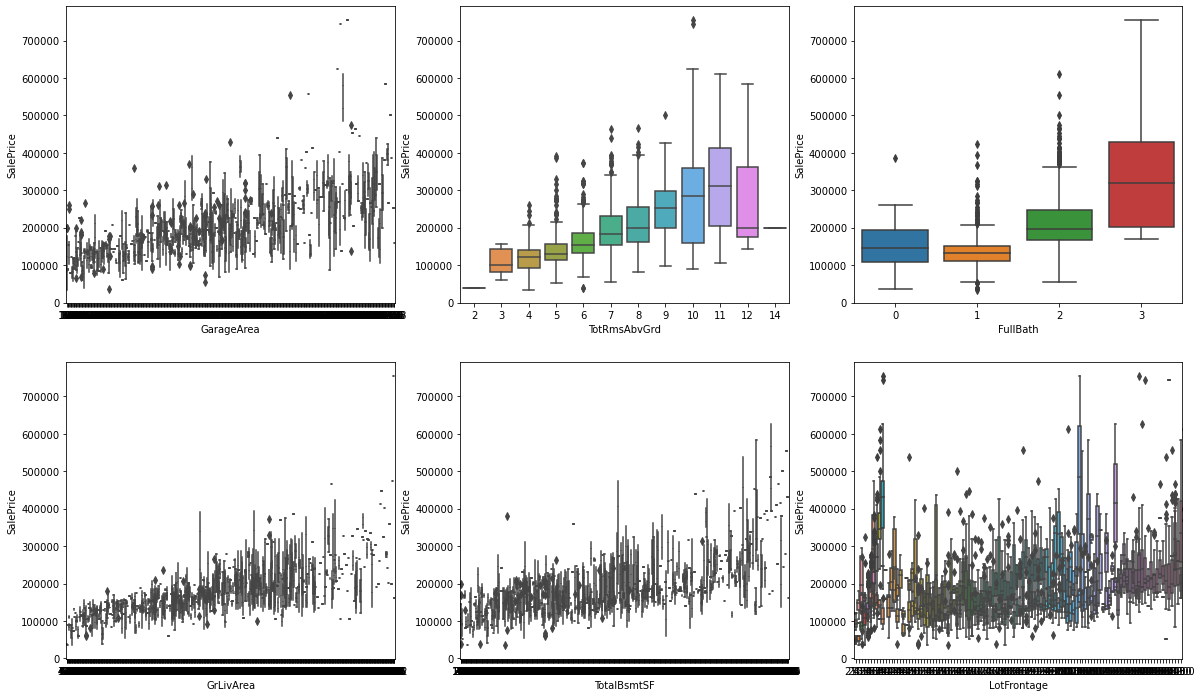

In [1405]:
# visualising the Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'GarageArea', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,2)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,3)
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,4)
sns.boxplot(x = 'GrLivArea', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,5)
sns.boxplot(x = 'TotalBsmtSF', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.boxplot(x = 'LotFrontage', y = 'SalePrice', data = Housing_Data)
plt.show()

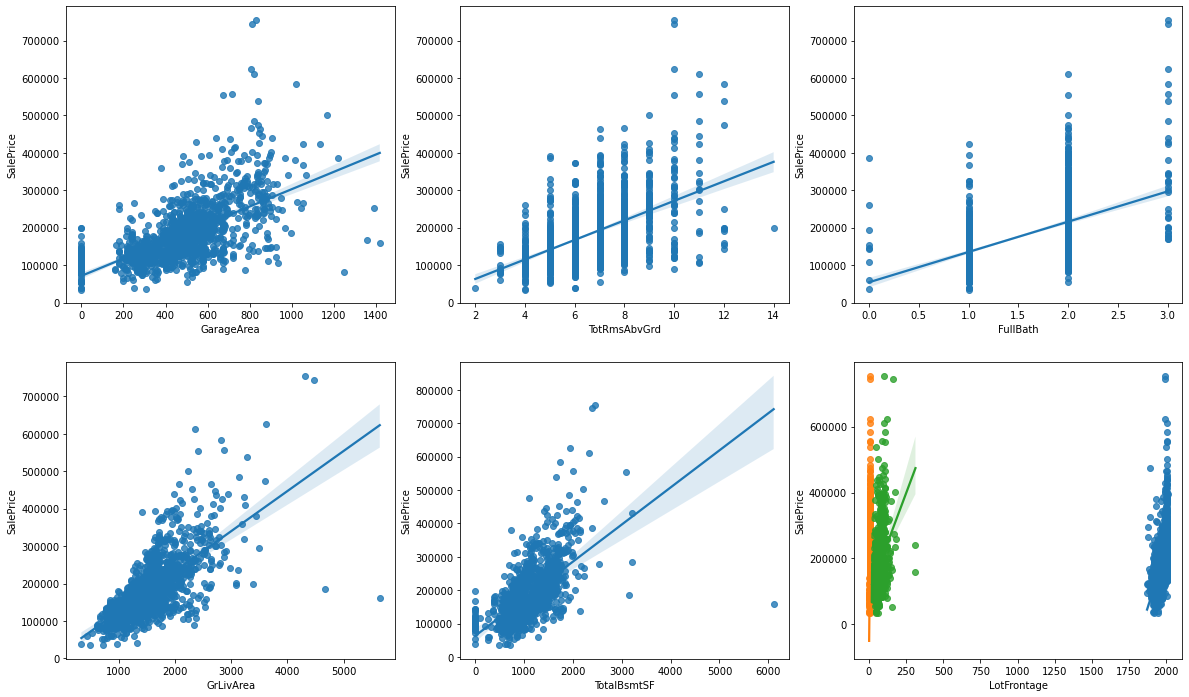

In [1406]:
# visualising the Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.regplot(x = 'GarageArea', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,2)
sns.regplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,3)
sns.regplot(x = 'FullBath', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,4)
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,5)
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = Housing_Data)
plt.subplot(2,3,6)
sns.regplot(x = 'LotFrontage', y = 'SalePrice', data = Housing_Data)
plt.show()

## Step 2: Preparing Data for modelling
- Encoding 
  - other categorical vars to dummy variables

In [1407]:
# Calculating the age from the year information.
def calculate_age(Year_built):
    today = date.today()
    return today.year - Year_built

Housing_Data['Building_age'] = Housing_Data['YearBuilt'].apply(calculate_age)
Housing_Data['Garage_age'] = Housing_Data['GarageYrBlt'].apply(calculate_age)
Housing_Data['BuldRemod_age'] = Housing_Data['YearRemodAdd'].apply(calculate_age)
Housing_Data['YearSold_age'] = Housing_Data['YrSold'].apply(calculate_age)

In [1408]:
# once the new columns created for a age of the building so date columns will be removed.
Housing_Data.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [1409]:
# Since Id column is not required for our analysis we are dropping out the ID column.
Housing_Data.drop(['Id'],axis=1,inplace=True)

In [1410]:
Housing_Data.CentralAir = Housing_Data['CentralAir'].apply(lambda x: 1 if x=="Yes" else 0)

In [1411]:
Housing_Data.Street = Housing_Data['Street'].apply(lambda x: 1 if x=="Grvl" else 0)

In [1412]:
Var_List = ["GarageType","GarageFinish","GarageQual","GarageCond","BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtQual","BsmtCond","MasVnrType"]
Var_List1 =["LotFrontage","MasVnrArea","Building_age","Garage_age","BuldRemod_age","YearSold_age"]
Housing_Data[Var_List] = Housing_Data[Var_List].fillna(Housing_Data[Var_List].mode()) # fill the NaN values to "mode"
Housing_Data[Var_List1] = Housing_Data[Var_List1].fillna(Housing_Data[Var_List1].mean()) # fill the NaN values to "mean"

### Dummy Variable Creation

In [1413]:
Cat_Var = ["SaleCondition","SaleType","PavedDrive","GarageCond","GarageQual","GarageFinish","GarageType","Functional","KitchenQual","Electrical","HeatingQC","Heating","BsmtFinType2","BsmtFinType1","BsmtExposure","BsmtCond","BsmtQual","Foundation","ExterCond","ExterQual","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","HouseStyle","BldgType","Condition1","Condition2","Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","MSZoning","MSSubClass"]

# Creating Dummy variables for categorical variable
dummy = pd.get_dummies(Housing_Data[Cat_Var],drop_first=True)
# Concating the dummy variables to main data frame
Housing_Data = pd.concat([Housing_Data , dummy],axis=1)
# Since we added the dummy variables to categorical variable so droping the variable
#Housing_Data = Housing_Data.drop([Cat_Var], axis=1)
Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,1,0,0,1,0
1,20,RL,80.0,9600,0,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,1,0,0,1,0
2,60,RL,68.0,11250,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,1,0
3,70,RL,60.0,9550,0,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,1,0,0,0,0,0,1,0
4,60,RL,84.0,14260,0,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,0,0,0,1,0


In [1414]:
Housing_Data = Housing_Data.drop(Cat_Var, axis=1)

In [1415]:
Housing_Data.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,7,5,196.0,706,0,150,856,...,0,0,1,0,0,1,0,0,1,0
1,80.0,9600,0,6,8,0.0,978,0,284,1262,...,0,0,1,0,0,1,0,0,1,0
2,68.0,11250,0,7,5,162.0,486,0,434,920,...,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,0,7,5,0.0,216,0,540,756,...,0,0,1,0,0,0,0,0,1,0
4,84.0,14260,0,8,5,350.0,655,0,490,1145,...,0,0,1,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing Sets

In [1416]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test = train_test_split(Housing_Data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [1417]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1418]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BedroomAbvGr","KitchenAbvGr","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","Fireplaces","GarageCars","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","Building_age","Garage_age","BuldRemod_age","YearSold_age","GarageArea"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
210,0.157534,0.019306,0,0.444444,0.625,0.00,0.082920,0.0,0.169521,0.141408,...,0,0,1,0,0,1,0,0,1,0
318,0.236301,0.039403,0,0.666667,0.500,0.16,0.174876,0.0,0.154110,0.220458,...,0,1,0,0,0,1,0,0,1,0
239,0.106164,0.033981,0,0.555556,0.375,0.00,0.016655,0.0,0.274401,0.120295,...,0,0,1,0,0,1,0,0,1,0
986,0.130137,0.017931,0,0.555556,0.875,0.00,0.000000,0.0,0.207620,0.079378,...,0,0,1,0,0,1,0,0,0,1
1416,0.133562,0.046139,0,0.333333,0.625,0.00,0.000000,0.0,0.332620,0.127169,...,0,0,1,0,0,1,0,0,0,1


In [1419]:
y_train = df_train.pop("SalePrice")
X_train = df_train

### RFE
Recursive feature elimination

In [1420]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge, Lasso

In [1421]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=55)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1422]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'Street', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'Building_age', 'SaleCondition_Partial',
       'SaleType_Con', 'SaleType_New', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_Po', 'GarageQual_TA', 'Functional_Sev', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Heating_OthW', 'Heating_Wall',
       'BsmtQual_Gd', 'BsmtQual_TA', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'RoofStyle_Shed', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Neighborhood_Crawfor',
   

### Building model using statsmodel, for the detailed statistics

In [1423]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     225.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.346e+04
Df Residuals:                     971   BIC:                         2.370e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.753e+

In [1424]:
X_train_rfe = X_train_rfe.drop(["Exterior2nd_CBlock","Exterior1st_CBlock","Exterior2nd_AsphShn","Exterior1st_AsphShn"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     235.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     973   BIC:                         2.369e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.757e+

In [1425]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 26),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 2),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 47),
 ('BsmtHalfBath', False, 128),
 ('FullBath', False, 158),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 118),
 ('Fireplaces', False, 146),
 ('GarageCars', True, 1),
 ('GarageArea', False, 25),
 ('WoodDeckSF', False, 75),
 ('OpenPorchSF', False, 60),
 ('EnclosedPorch', False, 100),
 ('3SsnPorch', False, 92),
 ('ScreenPorch', False, 112),
 ('PoolArea', True, 1),
 ('MiscVal', False, 42),
 ('MoSold', False, 133),
 ('Building_age', True, 1),
 ('Garage_age', False, 96),
 ('BuldRemod_age', False, 31),
 ('YearSold_age', False

In [1426]:
X_train_rfe = X_train_rfe.drop(["GarageCond_Po"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     235.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     973   BIC:                         2.369e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.757e+

In [1427]:
X_train_rfe = X_train_rfe.drop(["GarageQual_TA"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     241.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     974   BIC:                         2.368e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.757e+

In [1428]:
X_train_rfe = X_train_rfe.drop(["GarageQual_Fa"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     246.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11679.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     975   BIC:                         2.368e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.758e+

In [1429]:
X_train_rfe = X_train_rfe.drop(["Condition2_PosA"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     251.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11680.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     976   BIC:                         2.367e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.769e+

In [1430]:
X_train_rfe = X_train_rfe.drop(["Heating_OthW"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11681.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     977   BIC:                         2.367e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.767e+

In [1431]:
X_train_rfe = X_train_rfe.drop(["GarageQual_Po"], axis=1 )
  
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     262.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:17   Log-Likelihood:                -11683.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     978   BIC:                         2.366e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.772e+

In [1432]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,SaleType_New,inf
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
18,SaleCondition_Partial,inf
12,GrLivArea,599304.61
9,1stFlrSF,327905.28
10,2ndFlrSF,126747.16
11,LowQualFinSF,980.26


In [1433]:
X_train_rfe = X_train_rfe.drop(["SaleType_New"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     262.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:18   Log-Likelihood:                -11683.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     978   BIC:                         2.366e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.772e+

In [1434]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,BsmtFinSF1,inf
6,BsmtFinSF2,inf
7,BsmtUnfSF,inf
8,TotalBsmtSF,inf
12,GrLivArea,599304.61
9,1stFlrSF,327905.28
10,2ndFlrSF,126747.16
11,LowQualFinSF,980.26
31,RoofMatl_CompShg,28.10
35,RoofMatl_Tar&Grv,10.73


In [1435]:
X_train_rfe = X_train_rfe.drop(["BsmtFinSF1"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     262.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:18   Log-Likelihood:                -11683.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     978   BIC:                         2.366e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.772e+

,Features,VIF
11,GrLivArea,599304.61
8,1stFlrSF,327905.28
9,2ndFlrSF,126747.16
10,LowQualFinSF,980.26
30,RoofMatl_CompShg,28.10
34,RoofMatl_Tar&Grv,10.73
26,KitchenQual_TA,8.13
35,RoofMatl_WdShake,7.69
36,RoofMatl_WdShngl,7.08
25,KitchenQual_Gd,6.15


In [1436]:
X_train_rfe = X_train_rfe.drop(["GrLivArea"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     262.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:19   Log-Likelihood:                -11683.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     978   BIC:                         2.366e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -6.79e+

,Features,VIF
29,RoofMatl_CompShg,115.43
2,OverallQual,49.32
7,TotalBsmtSF,30.41
20,GarageCond_TA,28.30
3,OverallCond,25.80
8,1stFlrSF,25.29
11,BedroomAbvGr,25.13
13,GarageCars,18.45
25,KitchenQual_TA,15.55
24,KitchenQual_Gd,10.06


In [1437]:
X_train_rfe = X_train_rfe.drop(["LowQualFinSF"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     269.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:19   Log-Likelihood:                -11683.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     979   BIC:                         2.366e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.785e+

,Features,VIF
28,RoofMatl_CompShg,115.22
2,OverallQual,49.29
7,TotalBsmtSF,30.41
19,GarageCond_TA,28.03
3,OverallCond,25.62
8,1stFlrSF,25.28
10,BedroomAbvGr,25.00
12,GarageCars,18.45
24,KitchenQual_TA,15.52
23,KitchenQual_Gd,10.05


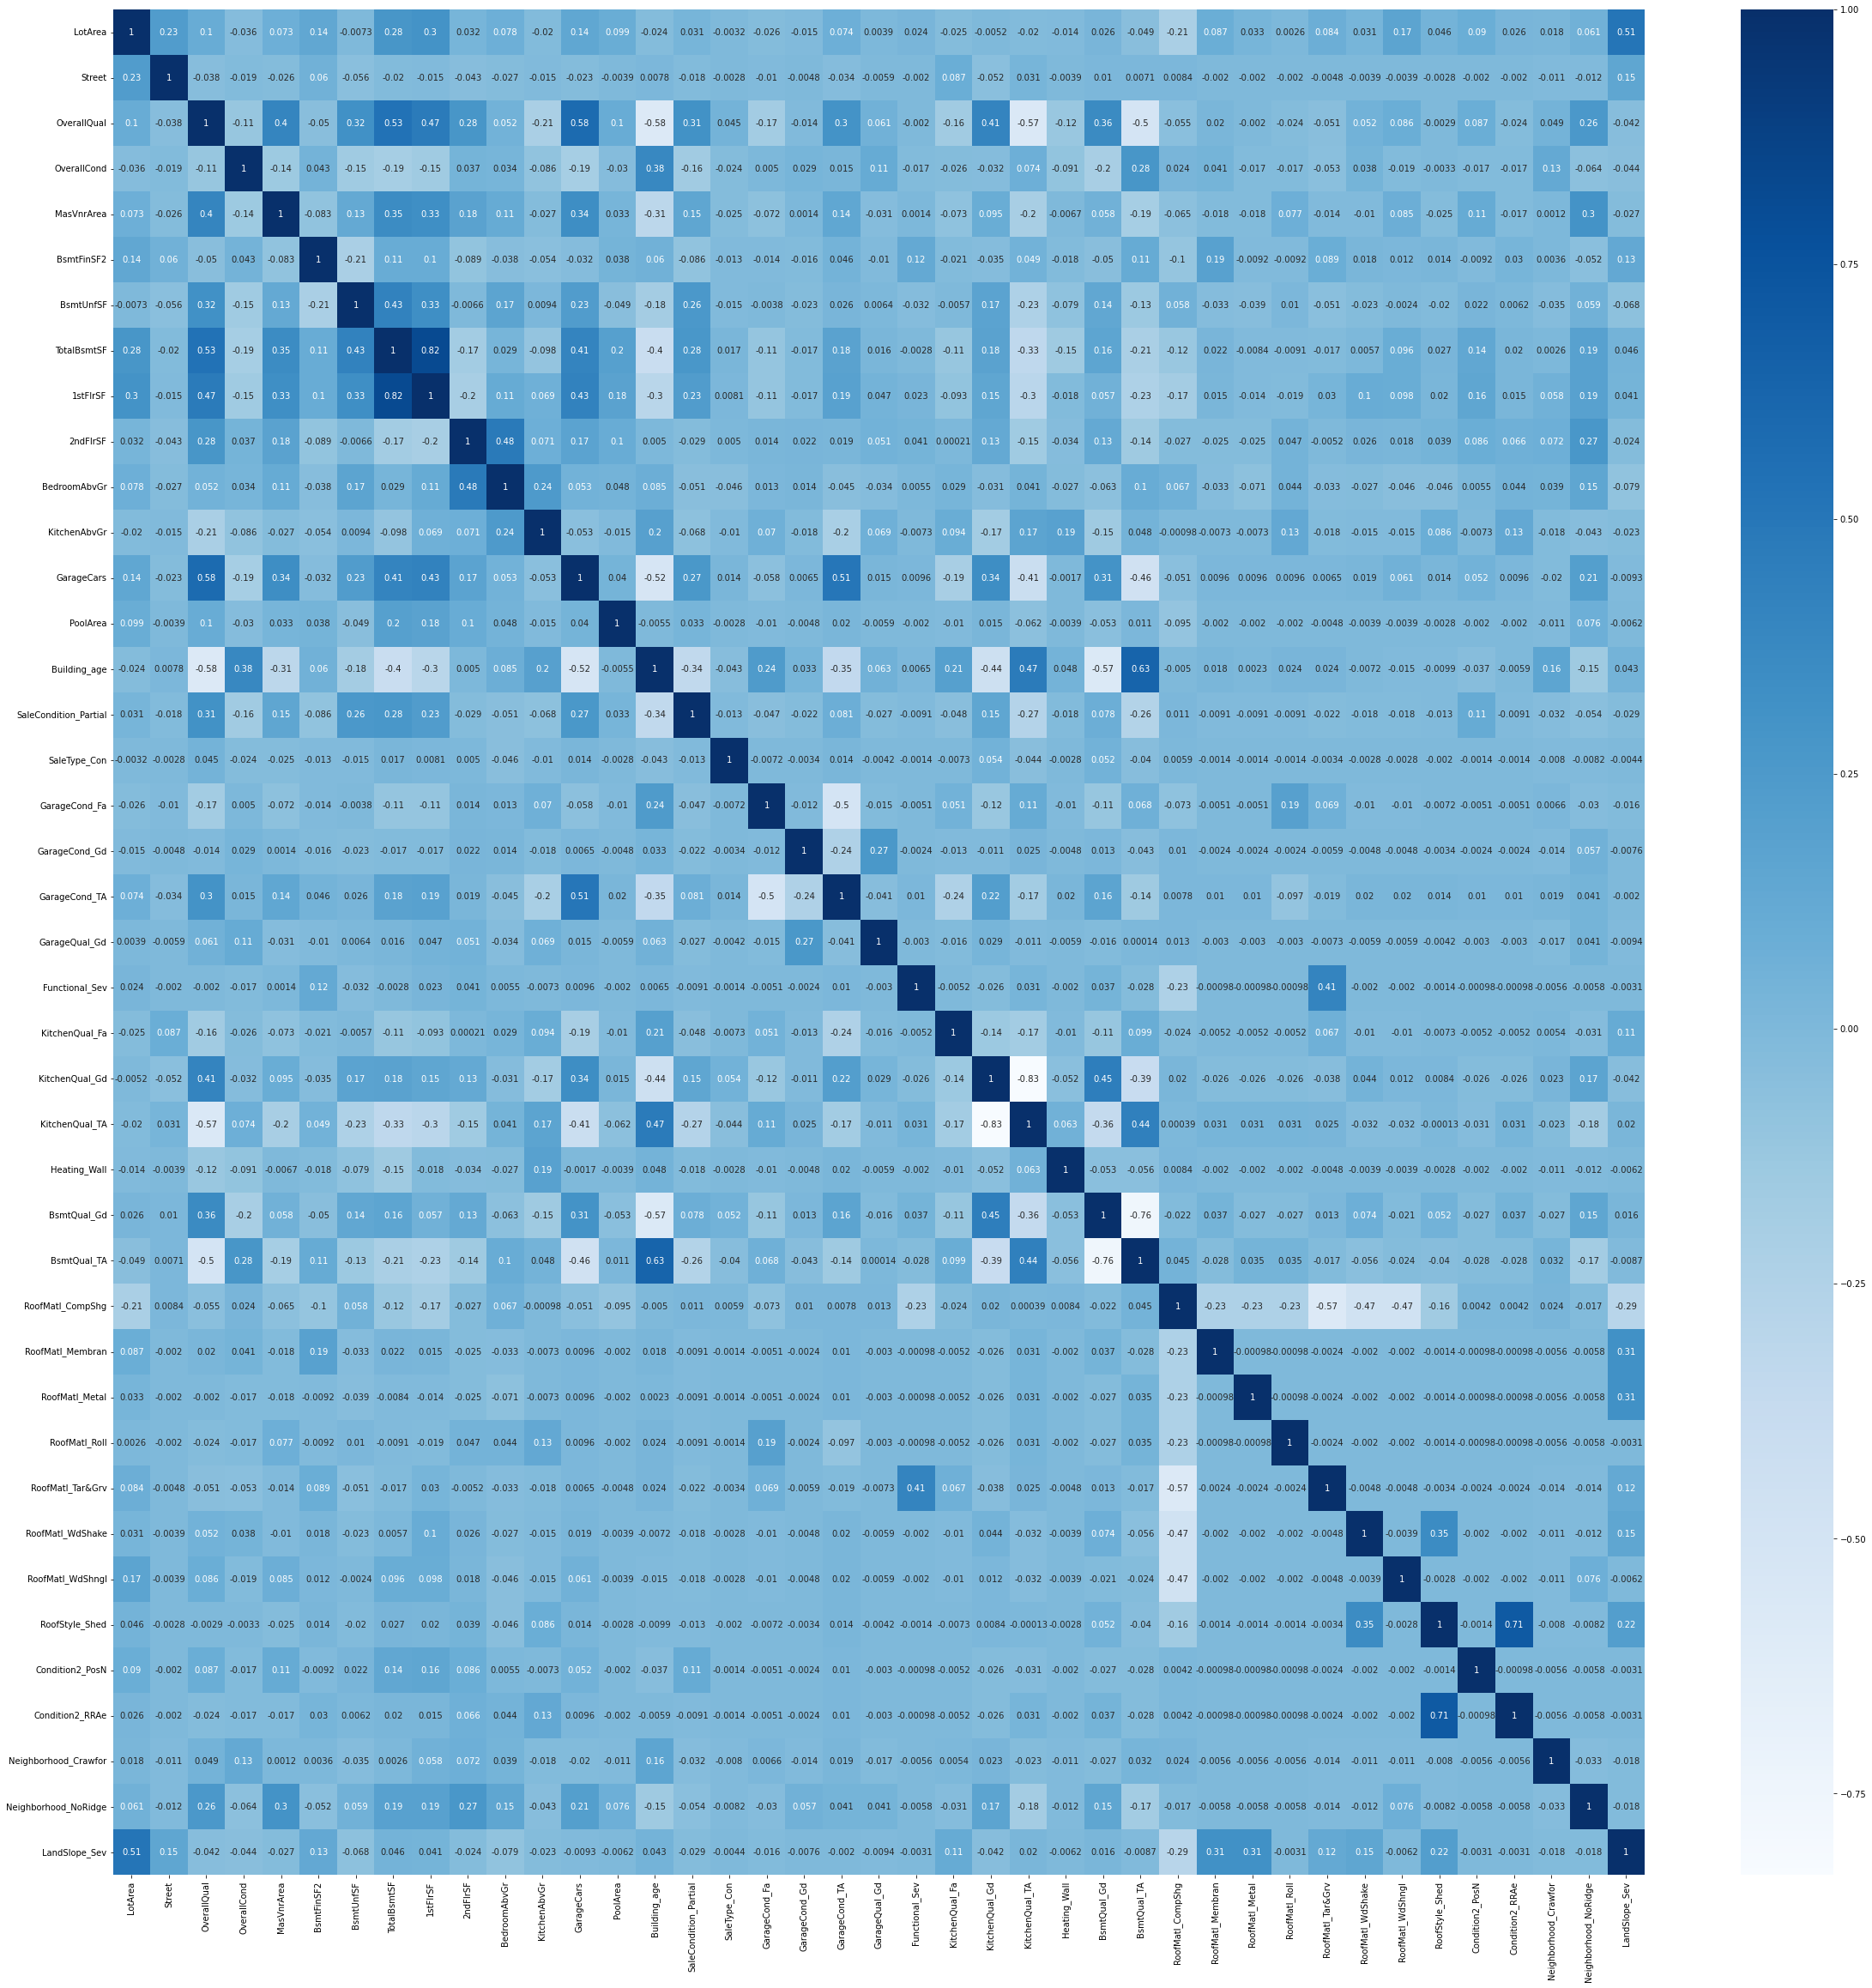

In [1438]:
# checking the relation between all the variables
plt.figure(figsize=(40,40))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap='Blues')
plt.show()

In [1439]:
X_train_rfe = X_train_rfe.drop(["OverallQual"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     250.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:31   Log-Likelihood:                -11730.
No. Observations:                1021   AIC:                         2.354e+04
Df Residuals:                     980   BIC:                         2.374e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.696e+

,Features,VIF
27,RoofMatl_CompShg,79.19
6,TotalBsmtSF,29.44
18,GarageCond_TA,28.03
2,OverallCond,25.22
7,1stFlrSF,24.86
9,BedroomAbvGr,24.69
11,GarageCars,18.27
23,KitchenQual_TA,14.54
22,KitchenQual_Gd,9.74
13,Building_age,8.48


In [1440]:
X_train_rfe = X_train_rfe.drop(["Heating_Wall"], axis=1 )

X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     255.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:31   Log-Likelihood:                -11731.
No. Observations:                1021   AIC:                         2.354e+04
Df Residuals:                     981   BIC:                         2.374e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.647e+

,Features,VIF
26,RoofMatl_CompShg,78.40
6,TotalBsmtSF,28.83
18,GarageCond_TA,27.88
2,OverallCond,25.01
7,1stFlrSF,24.76
9,BedroomAbvGr,24.68
11,GarageCars,18.27
23,KitchenQual_TA,14.54
22,KitchenQual_Gd,9.74
13,Building_age,8.45


In [1441]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_CompShg"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:31   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.407e+04
Df Residuals:                     982   BIC:                         2.426e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+

,Features,VIF
6,TotalBsmtSF,27.74
18,GarageCond_TA,26.32
7,1stFlrSF,24.74
9,BedroomAbvGr,23.40
2,OverallCond,20.48
11,GarageCars,17.74
23,KitchenQual_TA,11.25
13,Building_age,8.30
22,KitchenQual_Gd,7.97
25,BsmtQual_TA,7.22


In [1442]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_Roll"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     150.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.407e+04
Df Residuals:                     983   BIC:                         2.426e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+

In [1443]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_WdShake"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.407e+04
Df Residuals:                     984   BIC:                         2.425e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.384e+

In [1444]:
X_train_rfe = X_train_rfe.drop(["BsmtFinSF2"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     159.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     985   BIC:                         2.424e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+

In [1445]:
X_train_rfe = X_train_rfe.drop(["LandSlope_Sev"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     986   BIC:                         2.423e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.381e+

In [1446]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_Tar&Grv"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     168.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11996.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     987   BIC:                         2.423e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.382e+

In [1447]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_Metal"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11997.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     988   BIC:                         2.422e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.386e+

In [1448]:
X_train_rfe = X_train_rfe.drop(["Condition2_RRAe"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     179.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11998.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     989   BIC:                         2.422e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.391e+

In [1449]:
X_train_rfe = X_train_rfe.drop(["RoofStyle_Shed"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -11998.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     990   BIC:                         2.421e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.389e+

In [1450]:
X_train_rfe = X_train_rfe.drop(["BedroomAbvGr"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     191.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:32   Log-Likelihood:                -12000.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     991   BIC:                         2.421e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.357e+

In [1451]:
X_train_rfe = X_train_rfe.drop(["Street"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12001.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     992   BIC:                         2.420e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.351e+

In [1452]:
X_train_rfe = X_train_rfe.drop(["RoofMatl_Membran"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12003.
No. Observations:                1021   AIC:                         2.406e+04
Df Residuals:                     993   BIC:                         2.420e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.343e+

In [1453]:
#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,TotalBsmtSF,26.24
15,GarageCond_TA,26.20
5,1stFlrSF,20.69
1,OverallCond,19.58
8,GarageCars,17.61
20,KitchenQual_TA,9.96
10,Building_age,8.17
19,KitchenQual_Gd,7.50
22,BsmtQual_TA,6.77
21,BsmtQual_Gd,5.77


In [1454]:
X_train_rfe = X_train_rfe.drop(["TotalBsmtSF"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     200.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12029.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     994   BIC:                         2.425e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.507e+

,Features,VIF
14,GarageCond_TA,26.19
1,OverallCond,19.39
7,GarageCars,17.49
4,1stFlrSF,10.00
19,KitchenQual_TA,9.95
9,Building_age,8.00
18,KitchenQual_Gd,7.47
21,BsmtQual_TA,6.11
20,BsmtQual_Gd,5.28
3,BsmtUnfSF,3.35


In [1455]:
X_train_rfe = X_train_rfe.drop(["BsmtUnfSF"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     208.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12030.
No. Observations:                1021   AIC:                         2.411e+04
Df Residuals:                     995   BIC:                         2.424e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    1.5e+

,Features,VIF
13,GarageCond_TA,26.08
1,OverallCond,19.26
6,GarageCars,17.34
18,KitchenQual_TA,9.95
3,1stFlrSF,8.88
8,Building_age,7.95
17,KitchenQual_Gd,7.45
20,BsmtQual_TA,5.94
19,BsmtQual_Gd,5.10
4,2ndFlrSF,2.40


In [1456]:
X_train_rfe = X_train_rfe.drop(["GarageCond_TA"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.7
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12040.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     996   BIC:                         2.425e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.404e+

,Features,VIF
1,OverallCond,17.81
6,GarageCars,10.42
17,KitchenQual_TA,8.99
3,1stFlrSF,8.84
8,Building_age,7.93
16,KitchenQual_Gd,7.02
19,BsmtQual_TA,5.85
18,BsmtQual_Gd,5.08
4,2ndFlrSF,2.40
0,LotArea,2.06


In [1457]:
X_train_rfe = X_train_rfe.drop(["GarageCond_Fa"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     220.8
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:33   Log-Likelihood:                -12041.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     997   BIC:                         2.425e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.399e+

,Features,VIF
1,OverallCond,17.71
6,GarageCars,10.31
16,KitchenQual_TA,8.99
3,1stFlrSF,8.80
8,Building_age,7.46
15,KitchenQual_Gd,7.02
18,BsmtQual_TA,5.80
17,BsmtQual_Gd,5.08
4,2ndFlrSF,2.40
0,LotArea,2.06


In [1458]:
X_train_rfe = X_train_rfe.drop(["GarageCond_Gd"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:34   Log-Likelihood:                -12042.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     998   BIC:                         2.424e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.397e+

,Features,VIF
1,OverallCond,17.71
6,GarageCars,10.30
15,KitchenQual_TA,8.98
3,1stFlrSF,8.80
8,Building_age,7.44
14,KitchenQual_Gd,7.02
17,BsmtQual_TA,5.77
16,BsmtQual_Gd,5.08
4,2ndFlrSF,2.40
0,LotArea,2.06


In [1459]:
X_train_rfe = X_train_rfe.drop(["OverallCond"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     230.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:34   Log-Likelihood:                -12062.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     999   BIC:                         2.428e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.683e+

,Features,VIF
5,GarageCars,9.75
2,1stFlrSF,8.33
14,KitchenQual_TA,8.21
13,KitchenQual_Gd,6.29
7,Building_age,6.26
16,BsmtQual_TA,5.50
15,BsmtQual_Gd,4.88
3,2ndFlrSF,2.35
0,LotArea,2.05
1,MasVnrArea,1.83


In [1460]:
X_train_rfe = X_train_rfe.drop(["GarageCars"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     229.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:38:34   Log-Likelihood:                -12085.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1000   BIC:                         2.432e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.907e+

,Features,VIF
13,KitchenQual_TA,7.59
6,Building_age,6.21
2,1stFlrSF,5.78
12,KitchenQual_Gd,5.68
15,BsmtQual_TA,5.50
14,BsmtQual_Gd,4.85
3,2ndFlrSF,2.08
0,LotArea,2.05
1,MasVnrArea,1.80
11,KitchenQual_Fa,1.45


In [1461]:
X_train_rfe = X_train_rfe.drop(["KitchenQual_TA"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     193.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          8.27e-319
Time:                        00:38:34   Log-Likelihood:                -12176.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1001   BIC:                         2.449e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.25e+

,Features,VIF
2,1stFlrSF,5.58
6,Building_age,4.93
14,BsmtQual_TA,4.07
13,BsmtQual_Gd,3.00
12,KitchenQual_Gd,2.35
3,2ndFlrSF,2.08
0,LotArea,2.05
1,MasVnrArea,1.80
7,SaleCondition_Partial,1.30
18,Neighborhood_NoRidge,1.28


In [1462]:
X_train_rfe = X_train_rfe.drop(["KitchenQual_Gd"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          7.67e-320
Time:                        00:38:34   Log-Likelihood:                -12177.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1002   BIC:                         2.449e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.256e+

In [1463]:
X_train_rfe = X_train_rfe.drop(["KitchenQual_Fa"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     216.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          8.28e-321
Time:                        00:38:34   Log-Likelihood:                -12177.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1003   BIC:                         2.448e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.255e+

,Features,VIF
2,1stFlrSF,5.21
6,Building_age,4.66
12,BsmtQual_TA,4.00
11,BsmtQual_Gd,2.54
0,LotArea,2.04
3,2ndFlrSF,2.01
1,MasVnrArea,1.79
7,SaleCondition_Partial,1.29
16,Neighborhood_NoRidge,1.28
4,KitchenAbvGr,1.18


In [1464]:
X_train_rfe = X_train_rfe.drop(["1stFlrSF"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     109.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          1.40e-207
Time:                        00:38:34   Log-Likelihood:                -12447.
No. Observations:                1021   AIC:                         2.493e+04
Df Residuals:                    1004   BIC:                         2.501e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.204e+

,Features,VIF
5,Building_age,4.47
11,BsmtQual_TA,3.69
2,2ndFlrSF,1.88
10,BsmtQual_Gd,1.79
0,LotArea,1.78
1,MasVnrArea,1.51
15,Neighborhood_NoRidge,1.25
6,SaleCondition_Partial,1.16
3,KitchenAbvGr,1.14
14,Neighborhood_Crawfor,1.08


In [1465]:
X_train_rfe = X_train_rfe.drop(["Functional_Sev"], axis=1 )
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.18e-208
Time:                        00:38:34   Log-Likelihood:                -12448.
No. Observations:                1021   AIC:                         2.493e+04
Df Residuals:                    1005   BIC:                         2.501e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.206e+

,Features,VIF
5,Building_age,4.47
10,BsmtQual_TA,3.68
2,2ndFlrSF,1.88
9,BsmtQual_Gd,1.79
0,LotArea,1.78
1,MasVnrArea,1.51
14,Neighborhood_NoRidge,1.25
6,SaleCondition_Partial,1.16
3,KitchenAbvGr,1.14
13,Neighborhood_Crawfor,1.08


In [1466]:
X_train_rfe.columns

Index(['LotArea', 'MasVnrArea', '2ndFlrSF', 'KitchenAbvGr', 'PoolArea',
       'Building_age', 'SaleCondition_Partial', 'SaleType_Con',
       'GarageQual_Gd', 'BsmtQual_Gd', 'BsmtQual_TA', 'RoofMatl_WdShngl',
       'Condition2_PosN', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge'],
      dtype='object')

In [1467]:
X_train_rfe.shape

(1021, 15)

In [1468]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

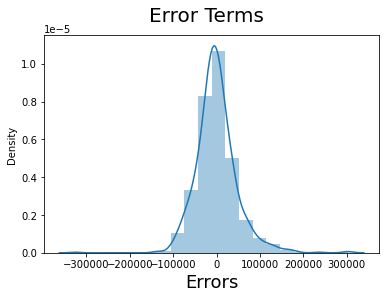

In [1469]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1470]:
X_train_rfe.dtypes

LotArea                  float64
MasVnrArea               float64
2ndFlrSF                 float64
KitchenAbvGr             float64
PoolArea                 float64
Building_age             float64
SaleCondition_Partial      uint8
SaleType_Con               uint8
GarageQual_Gd              uint8
BsmtQual_Gd                uint8
BsmtQual_TA                uint8
RoofMatl_WdShngl           uint8
Condition2_PosN            uint8
Neighborhood_Crawfor       uint8
Neighborhood_NoRidge       uint8
dtype: object

#### Dividing into X_test and y_test

In [1471]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1472]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["LotFrontage","LotArea","OverallQual","OverallCond","MasVnrArea","BedroomAbvGr","KitchenAbvGr","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","Fireplaces","GarageCars","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","Building_age","Garage_age","BuldRemod_age","YearSold_age","GarageArea"]

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1473]:
Test_Col = ['LotArea', 'MasVnrArea', '2ndFlrSF', 'KitchenAbvGr', 'PoolArea',
       'Building_age', 'SaleCondition_Partial', 'SaleType_Con',
       'GarageQual_Gd', 'BsmtQual_Gd', 'BsmtQual_TA', 'RoofMatl_WdShngl',
       'Condition2_PosN', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge']

In [1474]:
# Creating X_test_sm dataframe

X_test = X_test[Test_Col]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [1475]:
X_test_sm.shape

(438, 16)

In [1476]:
y_test.shape

(438,)

In [1477]:
# Making predictions using the fourth model
y_test_pred = lm.predict(X_test_sm)

In [1478]:
from sklearn.metrics import r2_score
print(r2_score(y_true =y_test,y_pred = y_test_pred))
print(r2_score(y_true =y_train,y_pred = y_train_pred))

0.567624655726858
0.6359722276571445


Text(0, 0.5, 'y_pred')

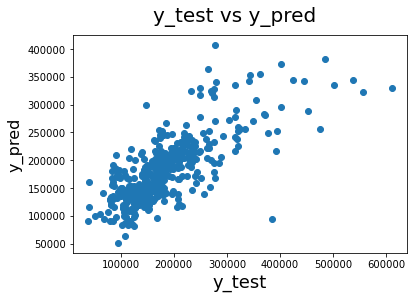

In [1479]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

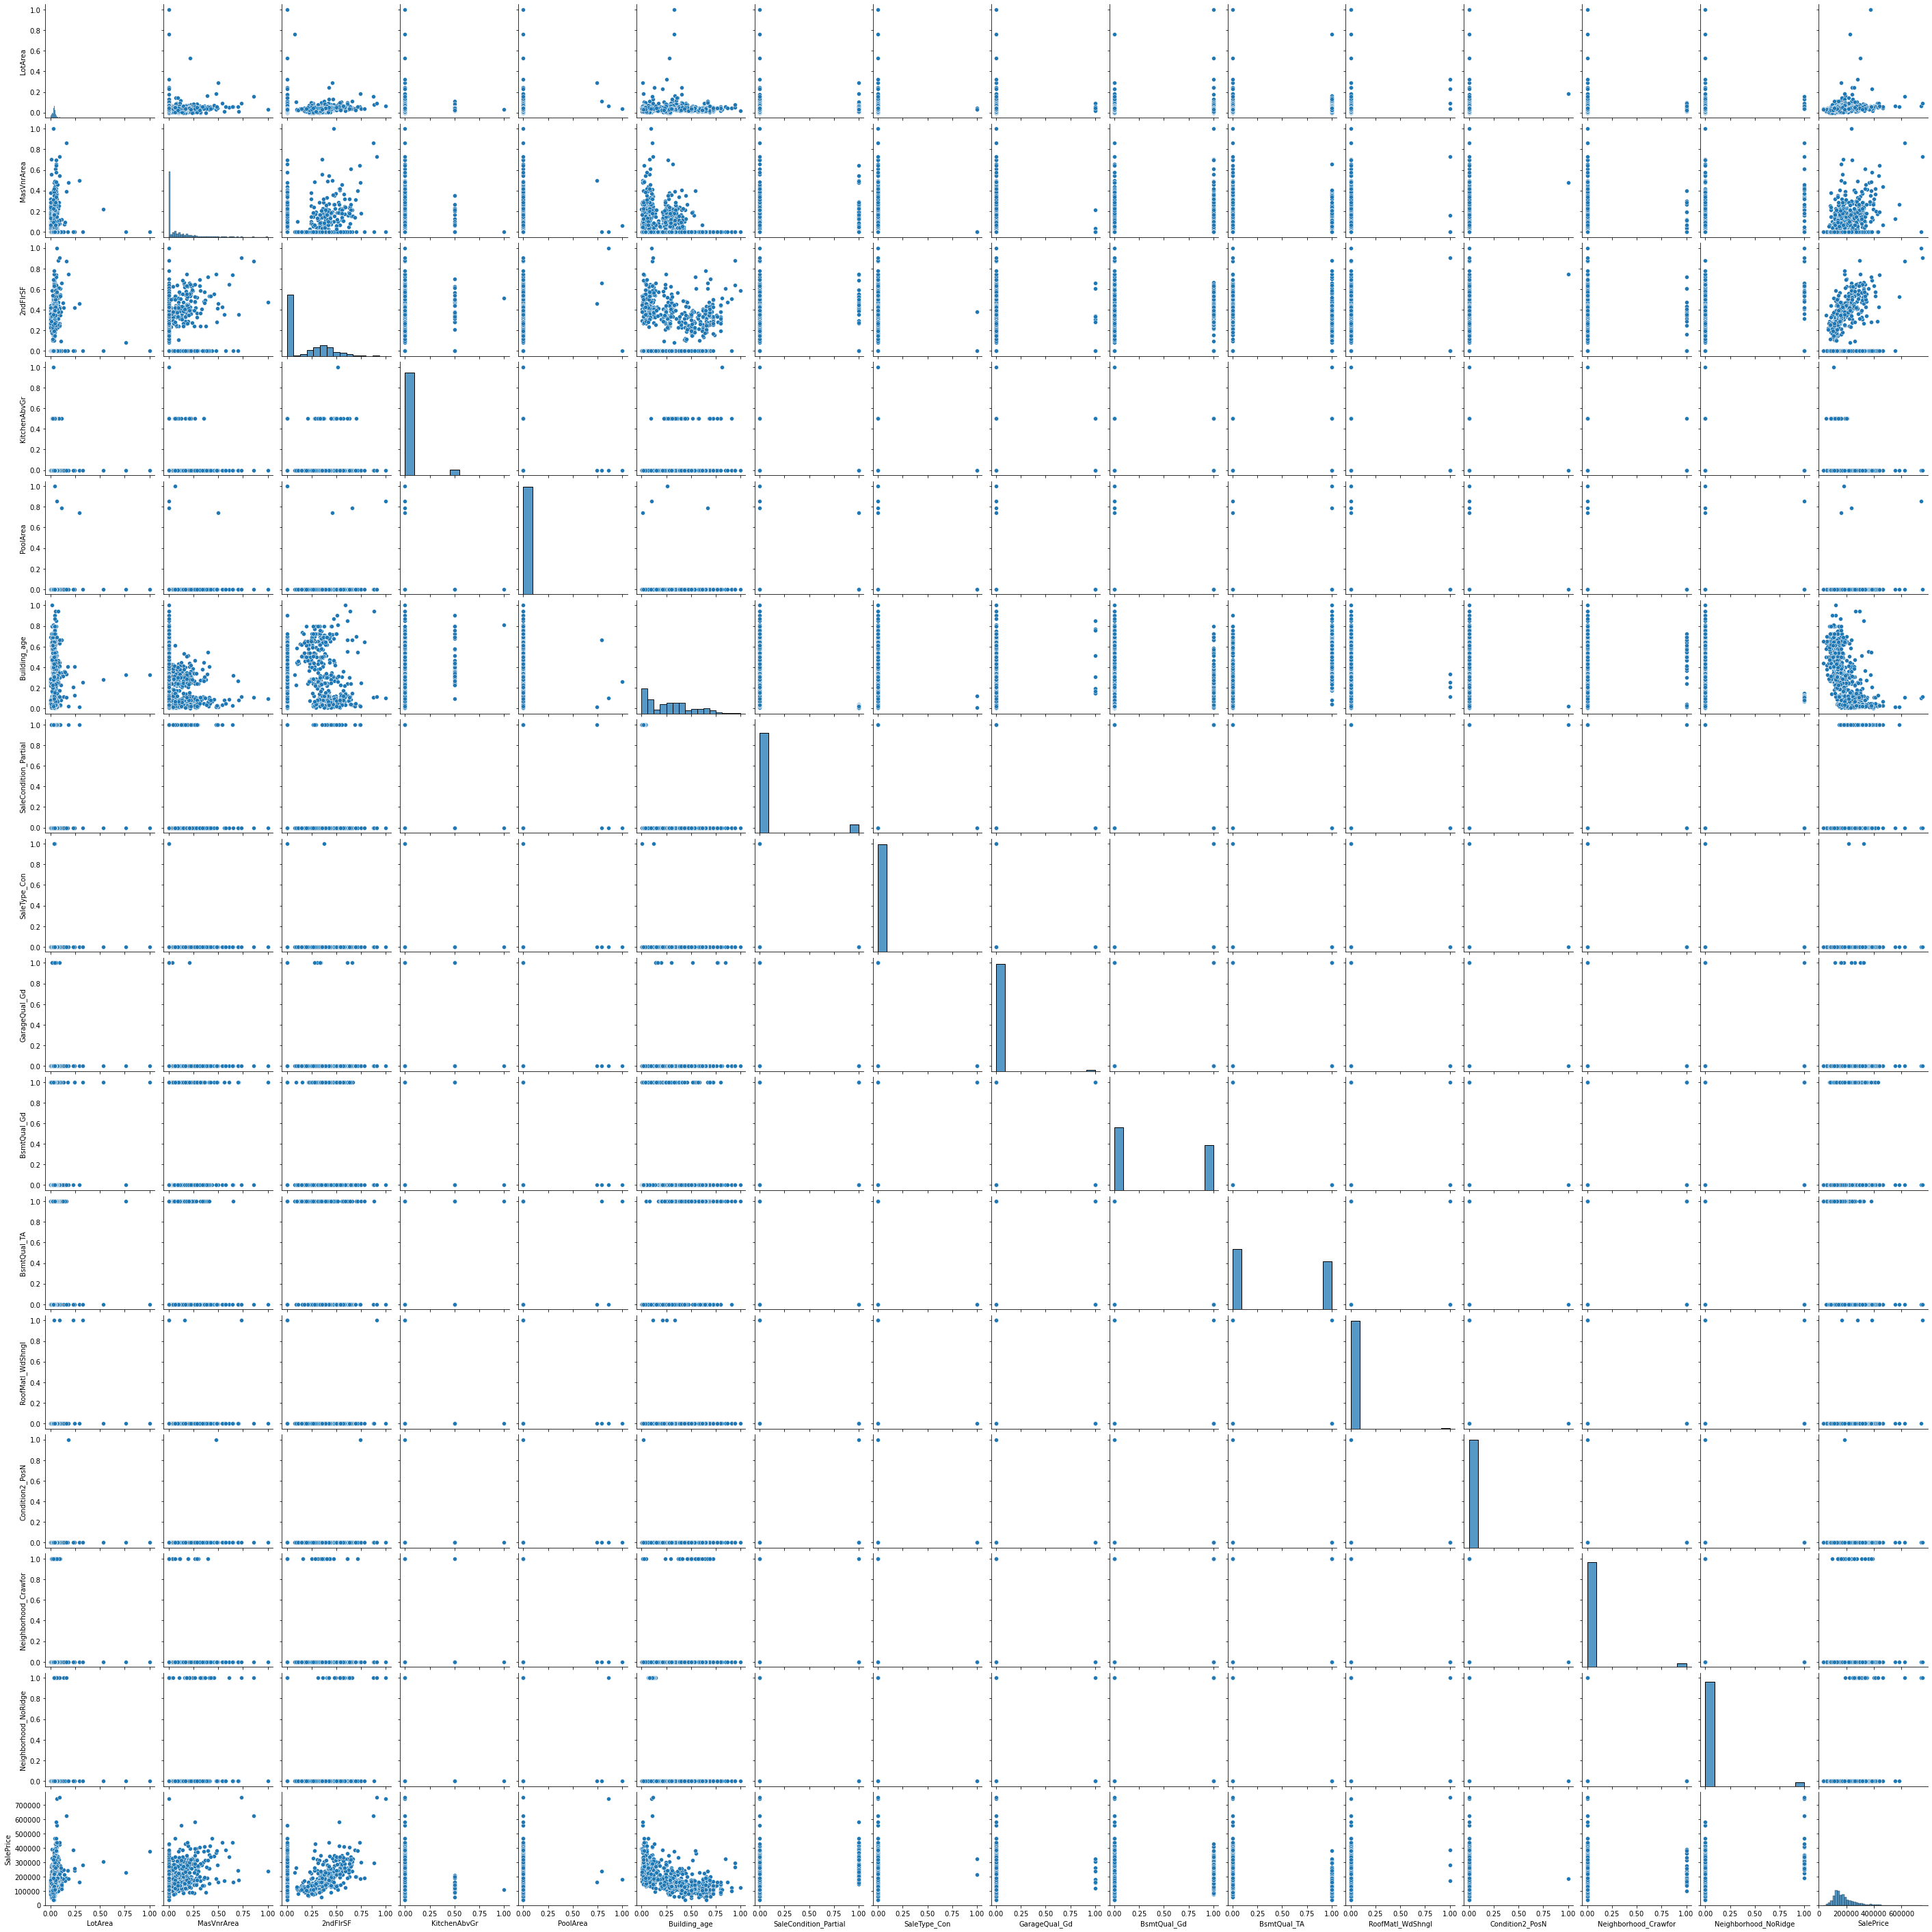

In [1480]:
# Plotting y_test and y_pred to understand the spread
Dataframe = pd.concat([X_train_rfe,y_train],axis=1)
sns.pairplot(Dataframe)

In [1481]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

0.6359722276571445
0.567624655726858
2322751569964.37
1218741800717.2388


### Ridge Regression with RFE

In [1482]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1483]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [1484]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
ridge = Ridge(alpha=0.01)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)
print(ridge.intercept_)

[ 304830.38108999  117706.74617846   77687.63632974  -66318.88338815
   61501.18968974 -139661.5970595    38333.4179627    79155.11584537
   65443.76819189  -47999.66057662  -48673.68978619  115328.34877518
 -237797.05523577   65349.92972752   84368.81970558]
220641.25300115952


In [1485]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

0.6359704432737276
0.5680472951070344
2322762955577.495
1217550501800.5159


## Lasso with RFE

In [1486]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1487]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1488]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=100)

In [1489]:
lasso.coef_

lasso.intercept_

221653.81506742586

In [1490]:
# Lets calculate some metrics such as R2 score, RSS

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

0.6312634788398893
0.5816078107679824
2352796677889.6685
1179327306388.9902


In [1491]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),6.359722e-01,6.359704e-01,6.312635e-01
1,R2 Score (Test),5.676247e-01,5.680473e-01,5.816078e-01
2,RSS (Train),2.322752e+12,2.322763e+12,2.352797e+12
3,RSS (Test),1.218742e+12,1.217551e+12,1.179327e+12


### coefficients

In [1492]:
Coefficinets = pd.DataFrame(index =X_train_rfe.columns)

Coefficinets['Ridge'] = ridge.coef_
Coefficinets['Lasso'] = lasso.coef_

Coefficinets.head(15)

,Ridge,Lasso
LotArea,304830.381090,265881.405235
MasVnrArea,117706.746178,111181.525711
2ndFlrSF,77687.636330,75380.889956
KitchenAbvGr,-66318.883388,-58501.698578
PoolArea,61501.189690,32336.041161
Building_age,-139661.597060,-137584.645171
SaleCondition_Partial,38333.417963,36753.989443
SaleType_Con,79155.115845,27189.154288
GarageQual_Gd,65443.768192,52917.963940
BsmtQual_Gd,-47999.660577,-45894.771398


In [1493]:
y_train_wo_rfe = y_train
X_train_wo_rfe = df_train
y_test_wo_rfe =y_test
X_test_wo_rfe = df_test

## Ridge Regression with out RFE

In [1494]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_wo_rfe, y_train_wo_rfe) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1495]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [1496]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
ridge = Ridge(alpha=6)

ridge.fit(X_train_wo_rfe, y_train_wo_rfe)
print(ridge.coef_)
print(ridge.intercept_)

[  -890.9530133   17618.48676531  -4623.39472362  60140.6059754
  21820.1540397   23315.4040549   13961.94714716  11602.16628395
  17443.34733282  22365.05436508      0.          36715.07619975
  52486.25619598  -3156.56721993  50993.00847605  22453.59036399
   2704.9633298   28767.07428668   9509.77882233   5303.0302422
 -15307.09039143  29496.08375983  19772.91688979  31451.04682294
  17752.13871759  14389.16109901   1602.35970291   2540.18774269
   9033.78159643   5717.76432941   4201.21973441   -397.66300685
  -1783.54159314  -5026.09627708   1262.69605333 -11755.63009834
   3480.75440825   1385.13959609   5650.84250724  -2495.28116769
   2983.42796054   4476.99593514   5755.46568998   4897.20493984
   6404.98348115    512.67857229   1277.79851837   4476.99593514
   1488.6701547   -1319.91722474   4421.35247444   1737.7601096
  -1168.55044358  -6321.47193509  -3290.77357603   3103.31220697
 -10057.88287106   9334.15630582  -3382.06532042  -3571.69186206
  -5420.64996751  -6088.9024

In [1497]:
y_pred_train_wo_rfe = ridge.predict(X_train_wo_rfe)
y_pred_test_wo_rfe = ridge.predict(X_test_wo_rfe)

metric2 = []
r2_train_lr = r2_score(y_train_wo_rfe, y_pred_train_wo_rfe)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_wo_rfe, y_pred_test_wo_rfe)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_wo_rfe - y_pred_train_wo_rfe))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_wo_rfe - y_pred_test_wo_rfe))
print(rss2_lr)
metric2.append(rss2_lr)

0.8901900068064791
0.8674932089724494
700664491740.4841
373498552225.8683


### Lasso with out RFE

In [1498]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_wo_rfe, y_train_wo_rfe) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1499]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [1500]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_wo_rfe, y_train_wo_rfe) 

Lasso(alpha=20)

In [1501]:
print(lasso.coef_)

print(lasso.intercept_)

[ 0.00000000e+00  8.86102140e+04 -1.83176179e+04  7.19304904e+04
  3.96129315e+04  3.01359751e+04  3.16584615e+04  9.48518349e+03
 -0.00000000e+00  9.54854338e+04  0.00000000e+00  0.00000000e+00
  4.72798292e+04 -1.69512122e+04  2.68028932e+05  1.86412129e+04
  8.93435018e+02  1.00478009e+04 -2.24373074e+03 -1.82098518e+04
 -2.94438714e+04 -0.00000000e+00  6.14557489e+03  3.48963590e+04
  0.00000000e+00  7.42272838e+03  5.47075853e+03 -0.00000000e+00
  9.69668551e+03  4.06511737e+03  1.56329589e+04 -0.00000000e+00
 -2.18612799e+03 -3.44158169e+04 -1.21883964e+02 -7.59915387e+03
  2.37960688e+03  9.39229249e+02  5.51403966e+03 -0.00000000e+00
  4.06333009e+03  1.43918152e+04  5.64285051e+03  1.33543890e+04
  6.41700572e+03  0.00000000e+00  0.00000000e+00  8.64667467e+01
  0.00000000e+00 -0.00000000e+00  8.46307215e+02  1.42831454e+02
  0.00000000e+00 -7.30875396e+03 -0.00000000e+00 -0.00000000e+00
 -1.31612868e+04  3.76203622e+03 -1.18355882e+04 -5.53383638e+03
 -3.48377534e+03 -1.93924

In [1502]:
# Lets calculate some metrics such as R2 score, RSS

y_pred_train_wo_rfe = lasso.predict(X_train_wo_rfe)
y_pred_test_wo_rfe = lasso.predict(X_test_wo_rfe)

metric3 = []
r2_train_lr = r2_score(y_train_wo_rfe, y_pred_train_wo_rfe)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_wo_rfe, y_pred_test_wo_rfe)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_wo_rfe - y_pred_train_wo_rfe))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_wo_rfe - y_pred_test_wo_rfe))
print(rss2_lr)
metric3.append(rss2_lr)

0.9369180548538407
0.8484502107159702
402506891662.77655
427175290026.8454


In [1503]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),6.359722e-01,8.901900e-01,9.369181e-01
1,R2 Score (Test),5.676247e-01,8.674932e-01,8.484502e-01
2,RSS (Train),2.322752e+12,7.006645e+11,4.025069e+11
3,RSS (Test),1.218742e+12,3.734986e+11,4.271753e+11


In [1504]:
Coefficinets = pd.DataFrame(index =X_train_wo_rfe.columns)

Coefficinets['Ridge'] = ridge.coef_
Coefficinets['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
Coefficinets.sort_values(by="Lasso", ascending=False)

,Ridge,Lasso
RoofMatl_WdShngl,39801.920317,423002.104449
RoofMatl_CompShg,2362.922338,357255.471012
RoofMatl_Membran,1721.141189,352523.282406
RoofMatl_WdShake,7184.515976,347807.282008
RoofMatl_Tar&Grv,-4407.317933,338531.806886
RoofMatl_Roll,1827.509105,337252.005845
RoofMatl_Metal,-1947.214341,325456.207546
GrLivArea,50993.008476,268028.931858
TotalBsmtSF,22365.054365,95485.433830
LotArea,17618.486765,88610.213996


###  Assignment Part-II  and Question

#### Question 1

In [1505]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =40

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_wo_rfe, y_train_wo_rfe) 

Lasso(alpha=40)

In [1506]:
print(lasso.coef_)

print(lasso.intercept_)

[-3.06741807e+03  4.80390068e+04 -7.92154234e+03  8.57719736e+04
  3.31051344e+04  2.69059537e+04  0.00000000e+00  9.89587115e+03
  2.48521530e+03  2.43564223e+04  0.00000000e+00  0.00000000e+00
  4.25517216e+04 -1.19857252e+04  2.45465187e+05  2.53753690e+04
  2.61789382e+03  1.71929136e+04  0.00000000e+00 -3.31971860e+03
 -2.80617067e+04  0.00000000e+00  8.35349449e+03  4.10003082e+04
 -0.00000000e+00  7.76259582e+03  1.00078180e+03  0.00000000e+00
  7.60223358e+03  4.87688616e+03 -0.00000000e+00 -0.00000000e+00
 -1.53922363e+03 -1.69078508e+04 -0.00000000e+00 -7.95906824e+03
  2.51896059e+03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.16457474e+03  1.18086172e+04  0.00000000e+00  2.24632325e+03
  7.74143459e+02  0.00000000e+00  0.00000000e+00  8.88774049e+00
  0.00000000e+00 -7.16276689e+02  1.01569302e+03 -0.00000000e+00
  0.00000000e+00 -5.22571090e+03 -0.00000000e+00 -0.00000000e+00
 -1.03485357e+04  5.22165643e+03 -0.00000000e+00 -3.93880041e+03
 -4.20578547e+03 -3.66847

In [1507]:
# Lets calculate some metrics such as R2 score, RSS

y_pred_train_wo_rfe = lasso.predict(X_train_wo_rfe)
y_pred_test_wo_rfe = lasso.predict(X_test_wo_rfe)

metric3 = []
r2_train_lr = r2_score(y_train_wo_rfe, y_pred_train_wo_rfe)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_wo_rfe, y_pred_test_wo_rfe)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_wo_rfe - y_pred_train_wo_rfe))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_wo_rfe - y_pred_test_wo_rfe))
print(rss2_lr)
metric3.append(rss2_lr)

0.9129761501600862
0.8517257452167855
555272974199.4108
417942499885.8025


In [1508]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
ridge = Ridge(alpha=12)

ridge.fit(X_train_wo_rfe, y_train_wo_rfe)
print(ridge.coef_)
print(ridge.intercept_)

[ 2.98640634e+03  1.18245504e+04 -3.51134719e+03  5.02872930e+04
  1.70656600e+04  2.04735815e+04  1.19690459e+04  8.36082858e+03
  1.69555695e+04  1.95557065e+04  0.00000000e+00  2.96442123e+04
  3.97101333e+04 -1.93678891e+03  4.01742844e+04  1.85904967e+04
  1.47095661e+03  2.70319404e+04  1.10096321e+04  7.60389759e+03
 -1.12622157e+04  2.90780971e+04  2.27858652e+04  2.78760805e+04
  2.03847014e+04  1.39455916e+04  3.46277245e+03  2.18528584e+03
  5.91318358e+03  5.12056853e+03  3.49335953e+03 -5.92730913e+02
 -1.35992249e+03 -3.98174445e+03 -4.31320753e+02 -1.32045459e+04
  3.64284118e+03  5.45663395e+02  3.70927317e+03 -2.43756234e+03
  2.41752174e+03  4.47380187e+03  3.99830110e+03  2.83979693e+03
  3.45051438e+03  1.25512655e+02  3.38853919e+02  4.47380187e+03
  3.43381248e+02 -1.86791933e+03  3.63067677e+03  2.12627034e+03
 -1.46147425e+03 -3.32159551e+03 -1.84153026e+03  4.48550465e+03
 -6.88866599e+03  7.81469634e+03 -1.33754544e+03 -1.72758029e+03
 -5.70829982e+03 -6.96635

In [1509]:
y_pred_train_wo_rfe = ridge.predict(X_train_wo_rfe)
y_pred_test_wo_rfe = ridge.predict(X_test_wo_rfe)

metric2 = []
r2_train_lr = r2_score(y_train_wo_rfe, y_pred_train_wo_rfe)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_wo_rfe, y_pred_test_wo_rfe)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_wo_rfe - y_pred_train_wo_rfe))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_wo_rfe - y_pred_test_wo_rfe))
print(rss2_lr)
metric2.append(rss2_lr)

0.8767527207752035
0.8599523083046089
786403766588.4739
394754183428.43744


In [1510]:
Coefficinets = pd.DataFrame(index =X_train_wo_rfe.columns)

Coefficinets['Ridge'] = ridge.coef_
Coefficinets['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
Coefficinets.sort_values(by="Lasso", ascending=False)

,Ridge,Lasso
GrLivArea,40174.284385,245465.186884
RoofMatl_WdShngl,25603.421676,134820.215124
OverallQual,50287.293038,85771.973568
RoofMatl_CompShg,-2434.894072,64837.503937
LotArea,11824.550362,48039.006790
RoofMatl_WdShake,4504.534131,46711.504288
Neighborhood_NoRidge,41499.766172,44456.482955
2ndFlrSF,39710.133311,42551.721572
GarageCars,27876.080517,41000.308214
OverallCond,17065.659998,33105.134382


In [1511]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),6.359722e-01,8.767527e-01,9.129762e-01
1,R2 Score (Test),5.676247e-01,8.599523e-01,8.517257e-01
2,RSS (Train),2.322752e+12,7.864038e+11,5.552730e+11
3,RSS (Test),1.218742e+12,3.947542e+11,4.179425e+11


#### Question 3:

In [1512]:
X_train_wo_rfe = X_train_wo_rfe.drop(["RoofMatl_WdShngl","RoofMatl_CompShg","RoofMatl_Membran","RoofMatl_WdShake","RoofMatl_Tar&Grv"],axis =1)


In [1513]:
X_test_wo_rfe = X_test_wo_rfe.drop(["RoofMatl_WdShngl","RoofMatl_CompShg","RoofMatl_Membran","RoofMatl_WdShake","RoofMatl_Tar&Grv"],axis =1)

In [1514]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_wo_rfe, y_train_wo_rfe) 

Lasso(alpha=20)

In [1515]:
# Lets calculate some metrics such as R2 score, RSS

y_pred_train_wo_rfe = lasso.predict(X_train_wo_rfe)
y_pred_test_wo_rfe = lasso.predict(X_test_wo_rfe)

metric3 = []
r2_train_lr = r2_score(y_train_wo_rfe, y_pred_train_wo_rfe)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_wo_rfe, y_pred_test_wo_rfe)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_wo_rfe - y_pred_train_wo_rfe))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_wo_rfe - y_pred_test_wo_rfe))
print(rss2_lr)
metric3.append(rss2_lr)

0.9101911267201171
0.8397650120577167
573043369919.3364
451656368313.4462


In [1516]:
Coefficinets = pd.DataFrame(index =X_train_wo_rfe.columns)

Coefficinets['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
Coefficinets.sort_values(by="Lasso", ascending=False)

,Lasso
GrLivArea,247060.251493
LotArea,102135.431588
OverallQual,85626.868826
2ndFlrSF,61239.330514
GarageCars,54100.091462
Neighborhood_NoRidge,46169.717170
Condition2_PosA,31705.910735
OverallCond,31060.928817
Neighborhood_NridgHt,29318.631771
MasVnrArea,27895.409946
